In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data_df = pd.read_csv('C:/Jiayang/JupyterLab/Comp_551/mini_project_1/bank-additional-full.csv', sep = ";")

In [18]:
data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [40]:
#check for null
missing_values = data_df.isnull().mean()*100
missing_values.sum()

0.0

In [36]:
# Divide cols
obj_col= []
for col in data_df.columns:
    if data_df[col].dtype == "object":
        obj_col.append(col)
print(obj_col)

quan_col = [i for i in var_names if i not in categs]
print(quan_col)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


KeyError: 'j'

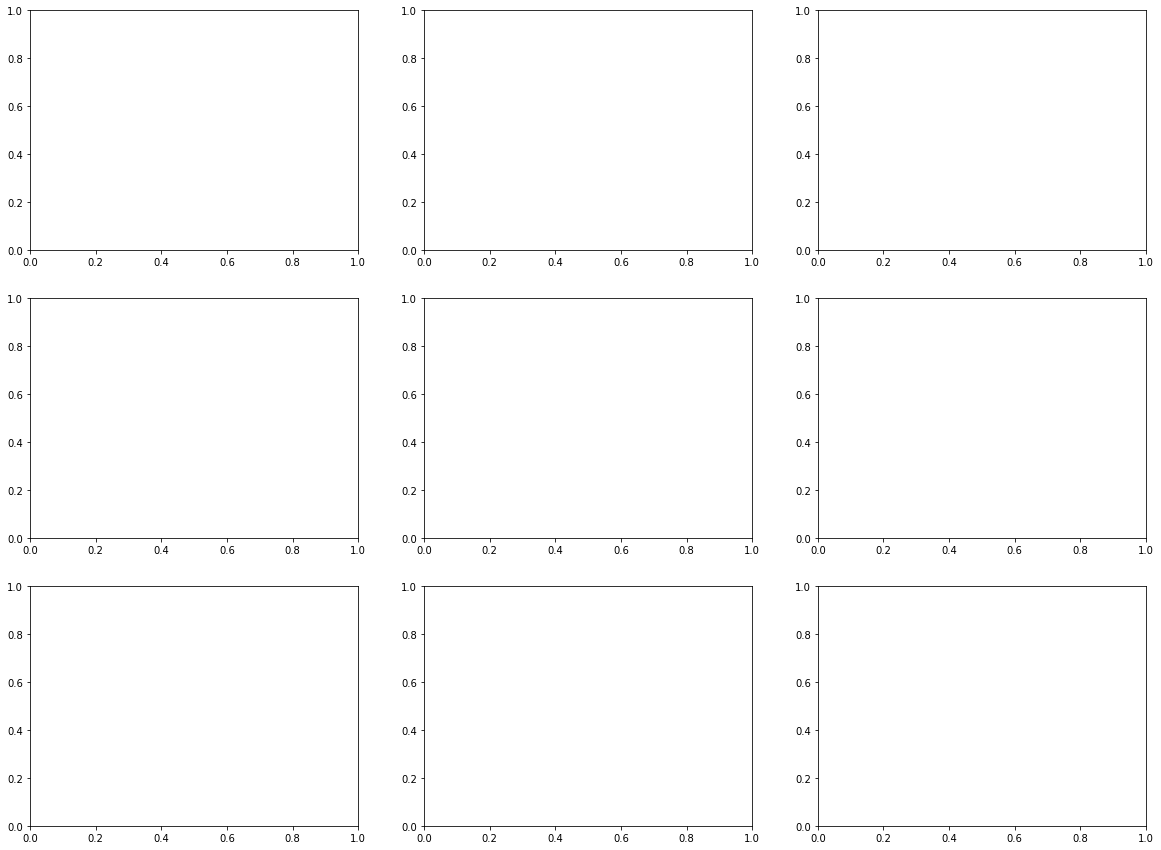

In [43]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for obj_col in obj_col:
    value_counts = data_df[obj_col].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(obj_col)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()


In [21]:
# Get dummy variables for categorical vars
job = pd.get_dummies(data['job'])
marital = pd.get_dummies(data['marital'])
education = pd.get_dummies(data['education'])
default = pd.get_dummies(data['default'])
housing = pd.get_dummies(data['housing'])
loan = pd.get_dummies(data['loan'])
contact = pd.get_dummies(data['contact'])
month = pd.get_dummies(data['month'])
day = pd.get_dummies(data['day_of_week'])
poutcome = pd.get_dummies(data['poutcome'])

# Map variable to predict
dict_map = dict()
y_map = {'yes':1,'no':0}
dict_map['y'] = y_map
data = data.replace(dict_map)
label = data['y']

df1 = data[quantit]
df1_names = df1.keys().tolist()

# Scale quantitative variables
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df1)
df1 = pd.DataFrame(x_scaled)
df1.columns = df1_names

# Get final df
final_df = pd.concat([df1,
                      job,
                      marital,
                      education,
                      default,
                      housing,
                      loan,
                      contact,
                      month,
                      day,
                      poutcome,
                      label], axis=1)

final_df.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,sep,fri,mon,thu,tue,wed,failure,nonexistent,success,y
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0


In [69]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Load data
data = pd.read_csv('C:/Jiayang/JupyterLab/Comp_551/mini_project_1/bank-additional-full.csv', sep = ";")
# Variables names
var_names = data.columns.tolist()

# Categorical vars
categs = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
# Quantitative vars
quantit = [i for i in var_names if i not in categs]

# Get dummy variables for categorical vars
job = pd.get_dummies(data['job'])
marital = pd.get_dummies(data['marital'])
education = pd.get_dummies(data['education'])
default = pd.get_dummies(data['default'])
housing = pd.get_dummies(data['housing'])
loan = pd.get_dummies(data['loan'])
contact = pd.get_dummies(data['contact'])
month = pd.get_dummies(data['month'])
day = pd.get_dummies(data['day_of_week'])
poutcome = pd.get_dummies(data['poutcome'])

# Map variable to predict
dict_map = dict()
y_map = {'yes':1,'no':0}
dict_map['y'] = y_map
data = data.replace(dict_map)
label = data['y']

df1 = data[quantit]
df1_names = df1.keys().tolist()

# Scale quantitative variables
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df1)
df1 = pd.DataFrame(x_scaled)
df1.columns = df1_names

# Get final df
final_df = pd.concat([df1,
                      job,
                      marital,
                      education,
                      default,
                      housing,
                      loan,
                      contact,
                      month,
                      day,
                      poutcome,
                      label], axis=1)

# Quick check
final_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,sep,fri,mon,thu,tue,wed,failure,nonexistent,success,y
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0


In [80]:
data2 = final_df.to_numpy()
data2

array([[0.48148148, 0.05307035, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.49382716, 0.03029687, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.24691358, 0.04595364, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.48148148, 0.03843026, 0.01818182, ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.08987393, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.7037037 , 0.04859699, 0.03636364, ..., 0.        , 0.        ,
        0.        ]])

## Cross Validation

In [72]:
import statistics as st
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier

In [73]:
def split(dataset, folds):
    return np.array_split(dataset, folds)

In [74]:
def KNN_cross_validation(dataset, folds, K):
    
    best_acc = 0
    best_config = 0
    best_model = neighbors.KNeighborsClassifier(n_neighbors=1)
    
    for k in np.arange(1,K):

        model = neighbors.KNeighborsClassifier(n_neighbors=k)
        
        data_splited = split(dataset, folds)
        
        for i in range(folds):
            
            acc_l = list()
            validation = data_splited[i]

            r = list(range(folds))
            r.pop(i)

            for j in r:

                if j == r[0] :
                    training = data_splited[j]
                else:
                    training = np.concatenate((training,data_splited[j]), axis=0)

            # model.fit(training[:,:14], training[:,14])
            # pred = model.predict(validation[:,:14])
            # acc = np.sum(pred == validation[:,14])/len(validation[:,14])
            # acc_l += acc

            model.fit(training[:,:14],training[:,14])
            pred = model.predict(validation[:,:14])
            acc = np.mean(pred == validation[:,14])
            acc_l.append(acc)

        acc_m = st.mean(acc_l)
        
        if best_acc < acc_m:
            best_acc = acc_m
            best_config = k
            best_model = model

    return  best_acc, best_config, best_model

In [75]:
%%time

KNN_cross_validation(data[:], 5, 20)

KeyboardInterrupt: 

## Decision Tress

In [76]:
def DT_cross_validation(dataset, folds, depth):
    
    best_acc = 0
    best_config = 0
    best_model = DecisionTreeClassifier(max_depth=1)

    for d in np.arange(1,depth):

        model = DecisionTreeClassifier(max_depth=d)
        
        data_splited = split(dataset, folds)
        
        for i in range(folds):
            
            acc_l = list()
            validation = data_splited[i]

            r = list(range(folds))
            r.pop(i)

            for j in r:

                if j == r[0] :
                    training = data_splited[j]
                else:
                    training = np.concatenate((training,data_splited[j]), axis=0)
        
            model.fit(training[:,:14],training[:,14])
            pred = model.predict(validation[:,:14])
            acc = np.mean(pred == validation[:,14])
            acc_l.append(acc)

        acc_m = st.mean(acc_l)

        if best_acc < acc_m:
                best_acc = acc_m
                best_config = d
                best_model = model

    return  best_acc, best_config, best_model

In [79]:
%%time
DT_cross_validation(data[:2000], 5, 10)

Wall time: 96.7 ms


(0.915, 1, DecisionTreeClassifier(max_depth=1))